# Example 1: Simulation data

You have the following data

```
X = torch.tensor([27, 35, 17, 51, 12.0, 26, 50, 52, 13])

Y = torch.tensor([1, 1, 0, 1, 0, 0,1,0,1])
```
where `X` is an income variable and `Y` is an indication of default.


You want to model

$$Y_i \sim {\rm Ber}(P_i)$$

Answer the following questions:

i. [Hand written] Properly model $P_i$ as a function of $X_i$.

ii. [Hand written] Write down a proper loss function ready for the gradient descent.

iii. [Torch] Use Pytorch to find the parameters.



In [23]:
import torch

X = torch.tensor([27, 35, 17, 51, 12.0, 26, 50, 52, 13]).reshape([-1,1])
Y = torch.tensor([1, 1, 0, 1, 0, 0,1,0,1]).reshape([-1,1])

ux = torch.mean(X)
stdx = torch.std(X)
XX = (X-ux)/stdx
ones = torch.ones([XX.shape[0],1])
XX = torch.concat([ones, XX], axis=1)
XX.shape

torch.Size([9, 2])

C:\Users\annyu\AppData\Local\Temp\ipykernel_20292\3798791162.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([2,1]), requires_grad=True)


tensor([[0.2441],
        [0.6085]], requires_grad=True)

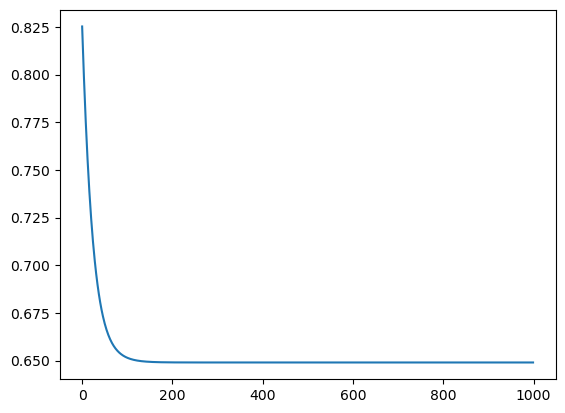

In [33]:
def forward(x):
    return torch.sigmoid(x @ beta)

beta = torch.tensor(torch.randn([2,1]), requires_grad=True)

def loss_ftn(phat, y):
    m = torch.distributions.bernoulli.Bernoulli(phat)
    return -torch.mean(m.log_prob(y))

def loss_ftn(phat, y):
    return -torch.mean(y * torch.log(phat) + (1-y) * torch.log(1-phat))

lr = 0.1
history=[]
epochs = 1000
optimizer = torch.optim.SGD([beta], lr=lr)

for i in range(epochs):
    phat = forward(XX)
    loss = loss_ftn(phat, Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    history.append(loss.item())

import matplotlib.pyplot as plt
plt.plot(history)

beta

iv. [Torch] You are given two new people with $X_6=10$ and $X_7=50$. Find the default rate of these people.

In [46]:
myX = torch.tensor([[10],
                   [50]], dtype=torch.float32)
myX = (myX - ux) / stdx
ones = torch.ones([2,1])
myX = torch.concat([ones, myX], axis=1)
forward(myX)

tensor([[0.3649],
        [0.7180]], grad_fn=<SigmoidBackward0>)

v. calculate test accuracy

In [ ]:
Correct = 0
n_test = len(test_loader.dataset)

for xx, yy in test_loader:
    phat = forward(xx)
    yhat = (phat > 0.5)*1.0
    Correct += torch.sum(yhat==yy)

Correct/n_test

In [ ]:
LOSS = 0
n_test = len(test_loader.dataset)
for xx, yy in test_loader:
  phat = forward(xx)
  loss = loss_ftn(phat, yy)
  LOSS += loss*len(xx)

# Test negative log-likelihood
LOSS